In [9]:
#Part A
def fact(j):
    if j<0 or j!=int(j):
        print("invalid j input")
        return -1
    else:
        p = 1
        for i in range(j):
            p = p*(i+1)
        return p
            
    
def comb(n,k):
    if k>n or k<0 or n<0 or int(k)!=k or int(n) !=n:
        print("invalid n,k input(s)")
        return -1
    if k == 0:
        return 1
    else:
        return fact(n)/(fact(k)*fact(n-k))

In [18]:
comb(1,1)

1

In [22]:
#Part B
for n in range(21):
    for i in range(n+1):
        print comb(n,i),
    print
    
    


1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


In [86]:
#Part C
def binpdf(n,k,p):
    if p<0 or p>1:
        print ("invalid p input")
        return -1
    else:         
        return comb(n,k)*p**k*(1-p)**(n-k)

def bincdf(n,k,p):
    s = 0
    for i in range(k,n+1):

        s = s + binpdf(n,i,p)
    return s

In [89]:
binpdf(4,1,.25)

0.421875

In [88]:
bincdf(4,1,.25)

0.68359375

In [106]:
#Part D
import numpy as np

def Nbincdf(n,k,p,N):
    if n<0 or k<0 or p<0 or p>1 or N<0 or N!=int(N) or n!= int(n) or k!= int(k):
        print("Invalid input(s)")
        return -1
    S = 0
    for i in range(N):
        s = 0
        for j in range(n):            
            if np.random.random() < p:
                s = s+1              
        if s>=k:
            S +=1
    return(float(S)/N)

In [107]:
Nbincdf(4,1,.25,10000)

0.6833

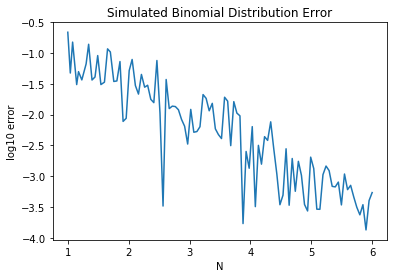

In [126]:
import matplotlib.pyplot as plt
Nums = []
y=[]
for i in np.linspace(1,6,100):
    N = int(10**i)
    Nums.append(N)
    y.append(Nbincdf(4,1,.25,N))
Y = np.asarray(y)
Y = np.log10(abs(Y-bincdf(4,1,.25)))
NUMS = np.asarray(Nums)
NUMS = np.log10(NUMS)

plt.title("Simulated Binomial Distribution Error")
plt.plot(NUMS,Y)
plt.ylabel("log10 error")
plt.xlabel("log N")
plt.show()


In [127]:
import scipy.optimize as opt

def linreg(x,a,b):
    return a*x+b

p_opt,p_cov = opt.curve_fit(linreg,NUMS,Y,[1,0])

print p_opt

[-0.50316826 -0.52664422]
